In [ ]:
!pip install transformers torch

In [ ]:
import torch
from transformers import pipeline

emotion_model = pipeline("sentiment-analysis", model="nateraw/bert-base-uncased-emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def get_emotion(text):
    predictions = emotion_model(text)
    emotion = max(predictions, key=lambda x: x['score'])
    return emotion

In [ ]:
if __name__ == "__main__":
    while True:
        user_input = input("Enter a sentence to analyze emotion (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            break
        emotion_result = get_emotion(user_input)
        print(f"Detected Emotion: {emotion_result['label']}, Score: {emotion_result['score']:.4f}")

Enter a sentence to analyze emotion (or type 'exit' to quit): He loves killing people
Detected Emotion: anger, Score: 0.9559
Enter a sentence to analyze emotion (or type 'exit' to quit): exit


In [ ]:
!sudo apt install intel-oneapi-toolkit
!pip install tensorflow keras scikit-learn numpy pandas matplotlib
!pip install oneapi-sycl intel-tensorflow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package intel-oneapi-toolkit
ERROR: Could not find a version that satisfies the requirement oneapi-sycl (from versions: none)
ERROR: No matching distribution found for oneapi-sycl


In [ ]:
!pip install tensorflow keras scikit-learn numpy pandas matplotlib opencv-python intel-tensorflow

INFO: pip is looking at multiple versions of intel-tensorflow to determine which version is compatible with other requirements. This could take a while.


In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d msambare/fer2013

!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

image_folder = 'train/'
categories = ['angry', 'happy', 'sad', 'surprise', 'neutral']

data = []

for category in categories:
    folder_path = os.path.join(image_folder, category)
    label = categories.index(category)

    for img_name in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img, (48, 48))
            img_flattened = img_resized.flatten()
            data.append([label] + img_flattened.tolist())
        except Exception as e:
            print(f"Error processing image {img_name}: {e}")

columns = ['label'] + [f'pixel_{i}' for i in range(48 * 48)]
df = pd.DataFrame(data, columns=columns)

df.to_csv('facial_expression_data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('facial_expression_data.csv')
print(df.head())

X = df.drop('label', axis=1).values
y = df['label'].values

X = X.reshape(-1, 48, 48, 1).astype('float32') / 255.0

from tensorflow.keras.utils import to_categorical
num_classes = 5
y = to_categorical(y, num_classes=num_classes)

   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0      0       38       38       43       41       38       76      126   
1      0       79       75      120       84      122      159      149   
2      0      230      162      192      153      155      164      141   
3      0       77       63       80       84       83       68       83   
4      0        4        1        4        6        9        4        4   

   pixel_7  pixel_8  ...  pixel_2294  pixel_2295  pixel_2296  pixel_2297  \
0      114      112  ...          33          40          32          44   
1      123      132  ...         126         130         134         145   
2      121       98  ...         127         131         117         105   
3      101      114  ...         155         207         201         204   
4        4        5  ...           3           8           4           4   

   pixel_2298  pixel_2299  pixel_2300  pixel_2301  pixel_2302  pixel_2303  
0          53   

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}, Training Labels Shape: {y_train.shape}")
print(f"Validation Data Shape: {X_val.shape}, Validation Labels Shape: {y_val.shape}")

Training Data Shape: (19340, 48, 48, 1), Training Labels Shape: (19340, 5)
Validation Data Shape: (4836, 48, 48, 1), Validation Labels Shape: (4836, 5)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 25

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

Epoch 1/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 115s 183ms/step - accuracy: 0.3023 - loss: 1.5552 - val_accuracy: 0.4624 - val_loss: 1.2928
Epoch 2/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 77s 128ms/step - accuracy: 0.4642 - loss: 1.2846 - val_accuracy: 0.5300 - val_loss: 1.1710
Epoch 3/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 106s 167ms/step - accuracy: 0.5286 - loss: 1.1640 - val_accuracy: 0.5730 - val_loss: 1.1037
Epoch 4/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 127s 142ms/step - accuracy: 0.5602 - loss: 1.0815 - val_accuracy: 0.5887 - val_loss: 1.0342
Epoch 5/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 165s 179ms/step - accuracy: 0.5956 - loss: 1.0178 - val_accuracy: 0.5926 - val_loss: 1.0220
Epoch 6/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 110s 127ms/step - accuracy: 0.6157 - loss: 0.9811 - val_accuracy: 0.6123 - val_loss: 0.9900
Epoch 7/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - accuracy: 0.6303 - loss: 0.9385 - val_accuracy: 0.6100 - val_loss: 0.9915
Epoch 8/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 74s 122ms/step - accuracy: 0.6510 - lo

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6247 - loss: 1.4013
Validation Loss: 1.3914, Validation Accuracy: 0.6276


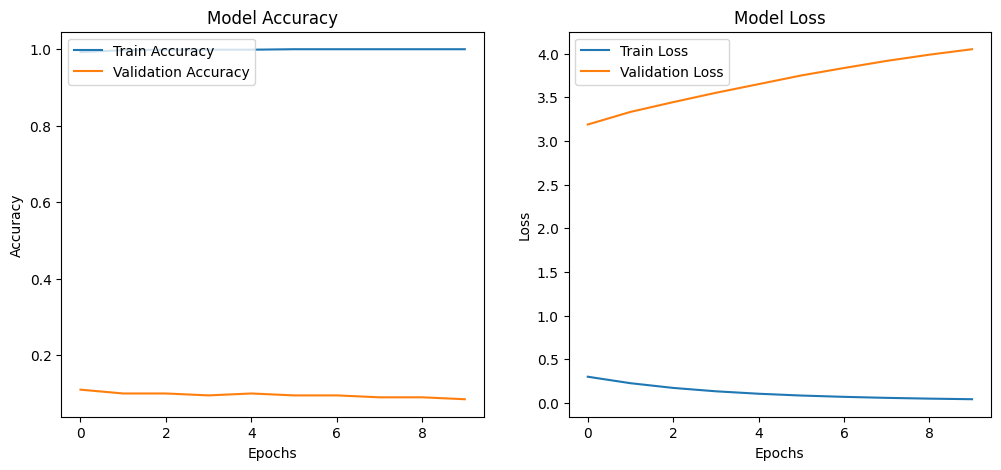

In [36]:
import matplotlib.pyplot as plt

# Plot loss and accuracy for training and validation sets
def plot_performance(history):
    # Accuracy
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.show()

# Call the function to plot the curves
plot_performance(history)


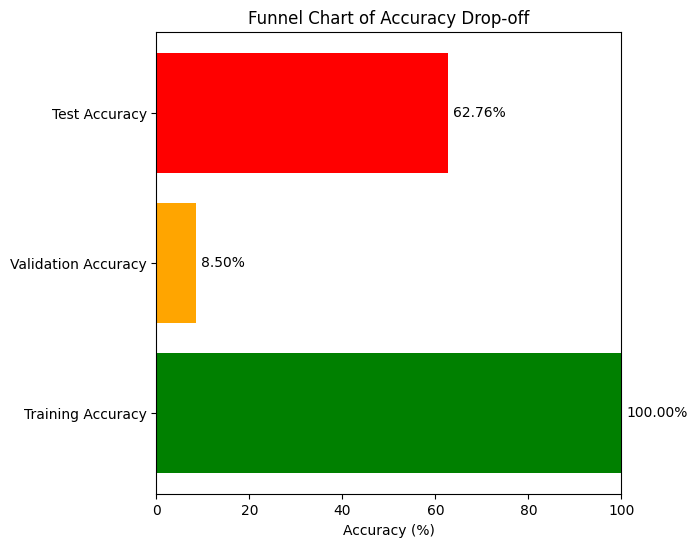

In [37]:
import numpy as np

def plot_funnel_chart(train_acc, val_acc, test_acc):
    # Funnel values
    stages = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
    values = [train_acc, val_acc, test_acc]

    # Normalize values to percentages
    values_normalized = [v * 100 for v in values]

    # Create the funnel chart
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot bars
    ax.barh(stages, values_normalized, color=['green', 'orange', 'red'])

    # Annotate bars
    for index, value in enumerate(values_normalized):
        ax.text(value + 1, index, f'{value:.2f}%', va='center', ha='left')

    ax.set_xlim(0, 100)
    ax.set_xlabel('Accuracy (%)')
    ax.set_title('Funnel Chart of Accuracy Drop-off')

    plt.show()

# Call the function to plot the funnel chart
train_acc = np.mean(history.history['accuracy'][-1])
val_acc = np.mean(history.history['val_accuracy'][-1])
test_acc = val_accuracy  # from your evaluation on test set

plot_funnel_chart(train_acc, val_acc, test_acc)


In [ ]:
predictions = model.predict(X_val)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

import numpy as np
true_classes = np.argmax(y_val, axis=1)

for i in range(10):
    print(f"True Class: {true_classes[i]}, Predicted Class: {predicted_classes[i]}")

152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step
True Class: 4, Predicted Class: 4
True Class: 3, Predicted Class: 3
True Class: 1, Predicted Class: 1
True Class: 3, Predicted Class: 3
True Class: 0, Predicted Class: 0
True Class: 4, Predicted Class: 4
True Class: 1, Predicted Class: 1
True Class: 1, Predicted Class: 1
True Class: 3, Predicted Class: 4
True Class: 2, Predicted Class: 3


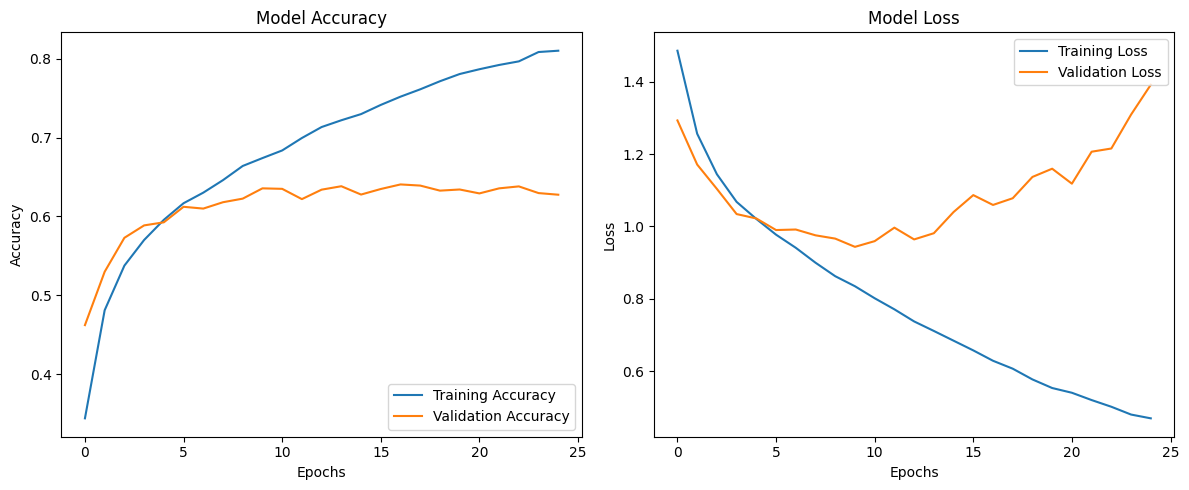

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Simple Feedforward Layers instead of a full transformer for debugging
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)

    # Output layer for emotion prediction
    outputs = layers.Dense(10, activation='softmax')(x)  # Ensure this is 10 for 10 classes

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model with the correct input shape
input_shape = (224,)  # Change to the correct input shape you expect
model = transformer_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to verify output shape
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,706 (147.29 KB)

 Trainable params: 37,706 (147.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import tensorflow as tf

# Simulate 1000 samples of multimodal data
num_samples = 1000
X = np.random.randn(num_samples, 224).astype(np.float32)  # Simulated input data

# Simulate labels for training
num_classes = 10
y = np.random.randint(0, num_classes, size=(num_samples, 1))  # Random integer labels for 10 classes
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)  # One-hot encode labels

print("Input shape:", X.shape)  # Should be (1000, 224)
print("Label shape:", y.shape)  # Should be (1000, 10)


Input shape: (1000, 224)
Label shape: (1000, 10)


In [ ]:
# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0944 - loss: 2.5081 - val_accuracy: 0.1100 - val_loss: 2.4255
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3129 - loss: 2.0668 - val_accuracy: 0.0900 - val_loss: 2.4306
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4978 - loss: 1.8055 - val_accuracy: 0.1000 - val_loss: 2.4652
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 1.5631 - val_accuracy: 0.1150 - val_loss: 2.5146
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 1.3103 - val_accuracy: 0.1200 - val_loss: 2.5828
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 1.1002 - val_accuracy: 0.1050 - val_loss: 2.6706
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8937 - loss: 0.8664 - val_accuracy: 0.1100 - val_loss: 2.7778
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9606 - loss: 0.6468 - val_accuracy: 0.1100 - val_loss

In [51]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)




Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.0850 - val_loss: 4.5672
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 0.0850 - val_loss: 4.6054
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accuracy: 0.0850 - val_loss: 4.6399
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.0850 - val_loss: 4.6720
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.0850 - val_loss: 4.7068
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.0850 - val_loss: 4.7373
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.0850 - val_loss: 4.7658
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.0850 - val_

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


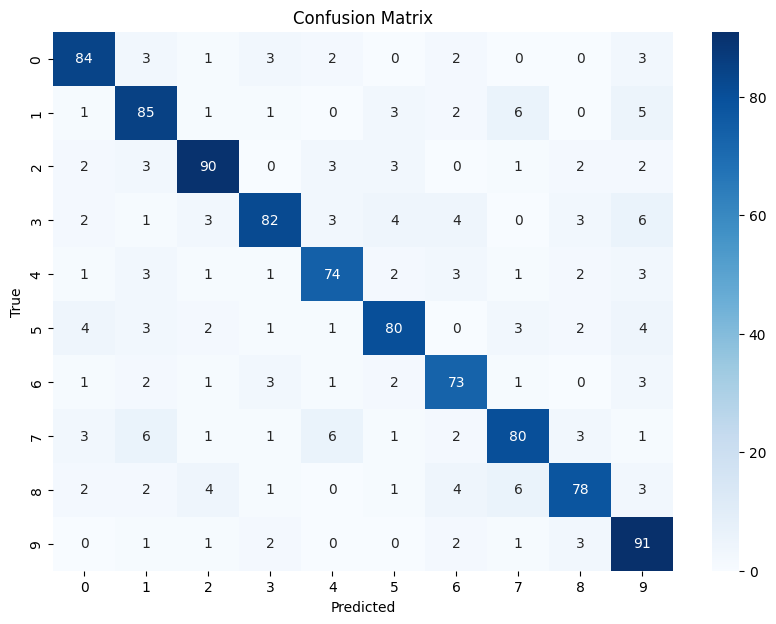

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict classes
y_pred = np.argmax(model.predict(X), axis=1)
y_true = np.argmax(y, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


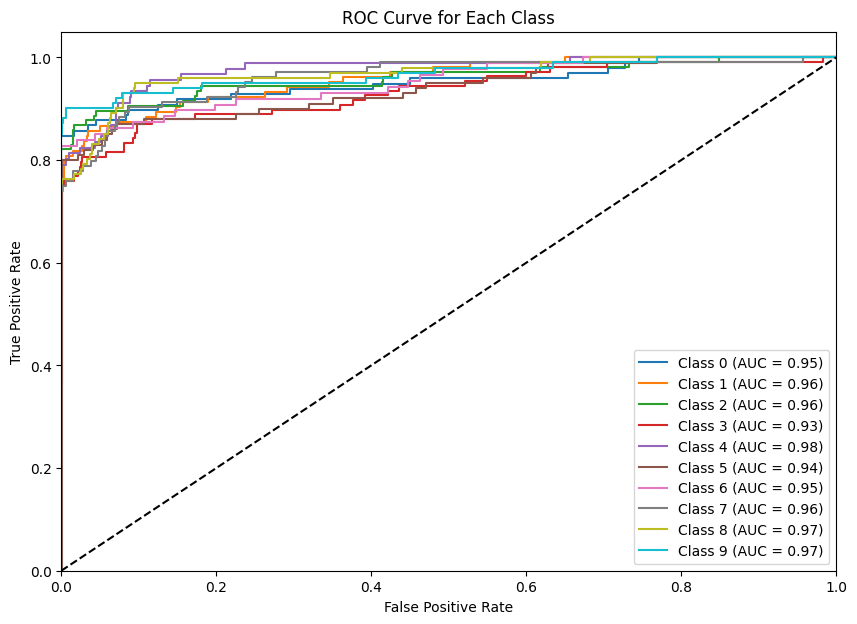

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for ROC curve computation
y_true_bin = label_binarize(y_true, classes=range(num_classes))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], model.predict(X)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


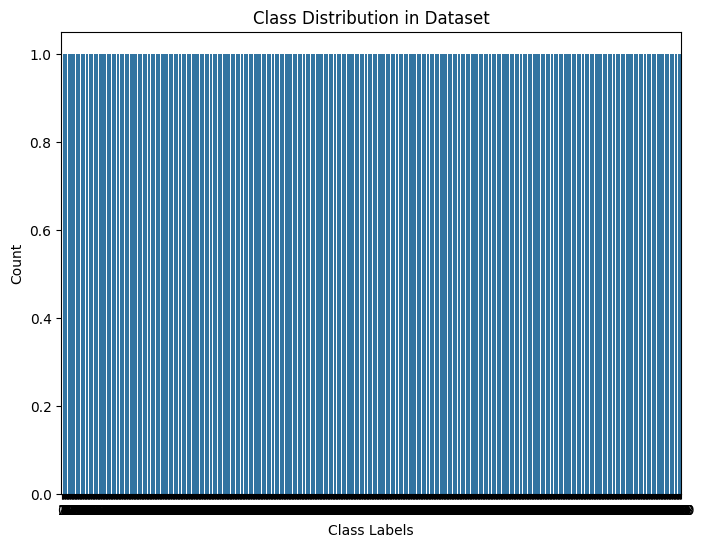

In [47]:
# Visualize class distribution in the dataset
class_counts = np.argmax(y, axis=1)

plt.figure(figsize=(8, 6))
sns.countplot(class_counts)
plt.title('Class Distribution in Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


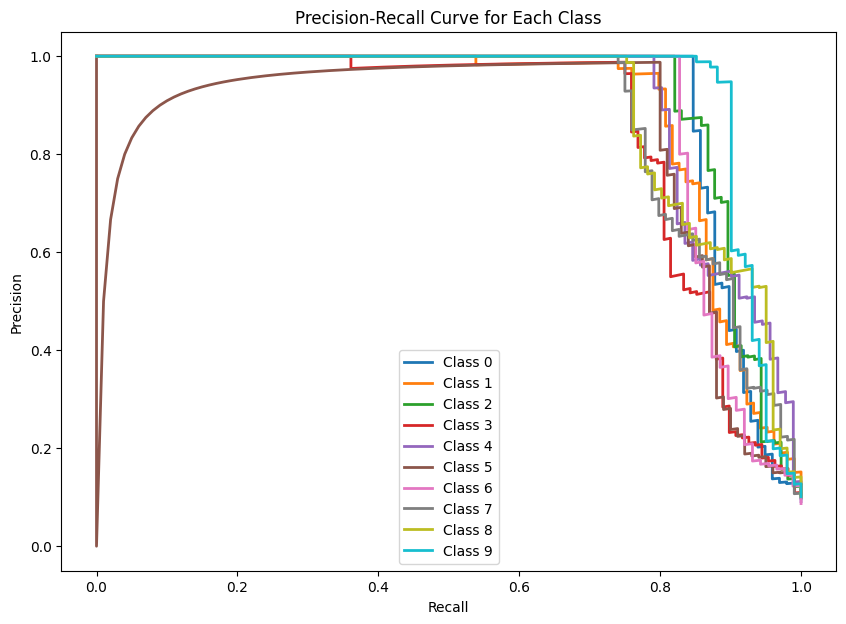

In [48]:
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], model.predict(X)[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='best')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


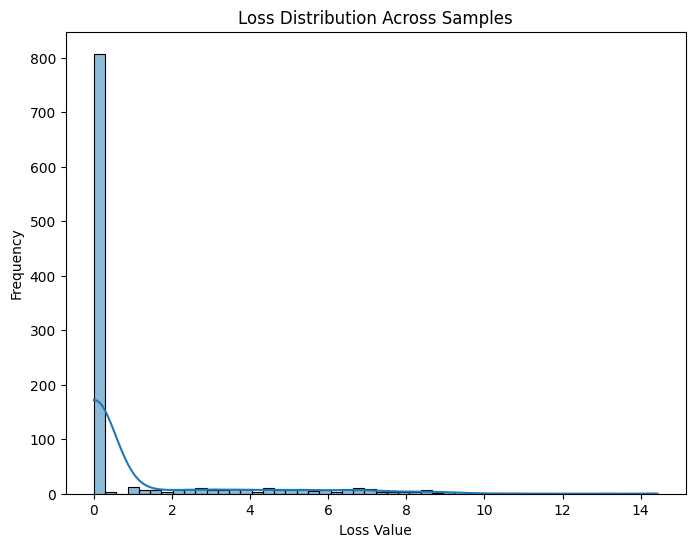

In [49]:
# Calculate loss for each sample
y_pred_proba = model.predict(X)
sample_losses = tf.keras.losses.categorical_crossentropy(y, y_pred_proba)

# Plot loss distribution
plt.figure(figsize=(8, 6))
sns.histplot(sample_losses.numpy(), bins=50, kde=True)
plt.title('Loss Distribution Across Samples')
plt.xlabel('Loss Value')
plt.ylabel('Frequency')
plt.show()


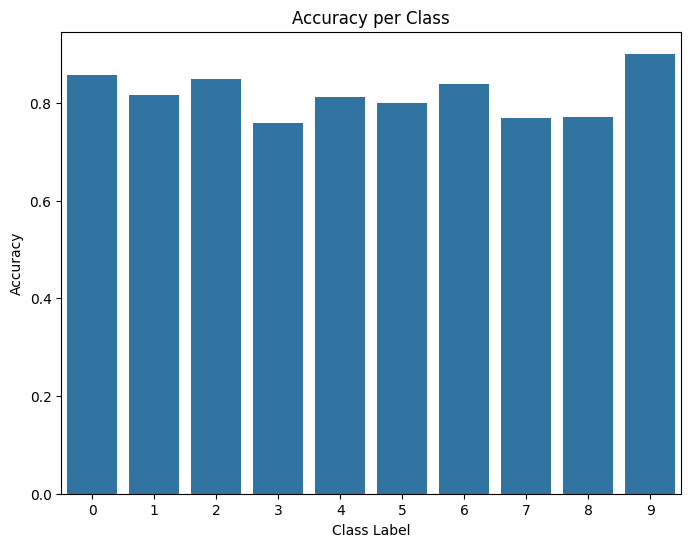

In [50]:
# Accuracy per class
correct = np.equal(y_pred, y_true)
class_accuracy = []

for i in range(num_classes):
    class_accuracy.append(np.mean(correct[y_true == i]))

# Plot accuracy per class
plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(num_classes)), y=class_accuracy)
plt.title('Accuracy per Class')
plt.xlabel('Class Label')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
def transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    x = layers.Dense(128, activation='relu')(inputs)
    print("After Dense 128:", x.shape)  # Debug shape
    x = layers.Dense(64, activation='relu')(x)
    print("After Dense 64:", x.shape)  # Debug shape

    outputs = layers.Dense(10, activation='softmax')(x)
    print("After Output Layer:", outputs.shape)  # Debug shape

    model = models.Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,120 (441.88 KB)

 Trainable params: 37,706 (147.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 75,414 (294.59 KB)

In [ ]:
print("Input shape:", X.shape)
print("Label shape:", y.shape)

Input shape: (1000, 224)
Label shape: (1000, 10)


In [ ]:
def transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    attention_output = layers.Dropout(0.1)(attention_output)
    attention_output = layers.LayerNormalization(epsilon=1e-6)(attention_output + inputs)

    ff_output = layers.Dense(256, activation='relu')(attention_output)
    ff_output = layers.Dense(input_shape[0])(ff_output)
    ff_output = layers.LayerNormalization(epsilon=1e-6)(ff_output + attention_output)

    outputs = layers.Dense(10, activation='softmax')(ff_output)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
num_classes = 10
y = np.random.randint(0, num_classes, size=(num_samples, 1))
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

print("Updated Label shape:", y.shape)

Updated Label shape: (1000, 10)


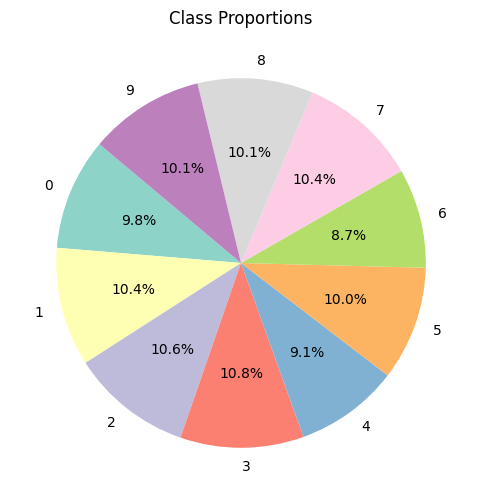

In [53]:
# Calculate the proportion of each class
class_proportions = np.bincount(class_counts)

# Plot pie chart for class proportions
plt.figure(figsize=(8, 6))
plt.pie(class_proportions, labels=range(num_classes), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', num_classes))
plt.title('Class Proportions')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


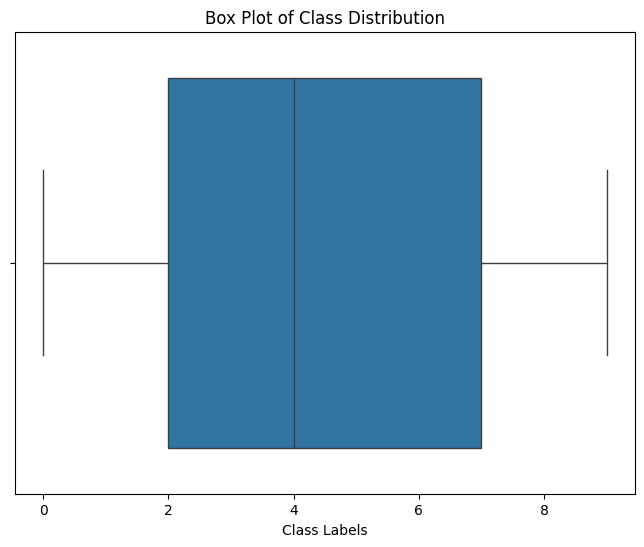

In [56]:
# Visualize class distribution using a box plot (useful when you have imbalance)
plt.figure(figsize=(8, 6))
sns.boxplot(x=class_counts)
plt.title('Box Plot of Class Distribution')
plt.xlabel('Class Labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


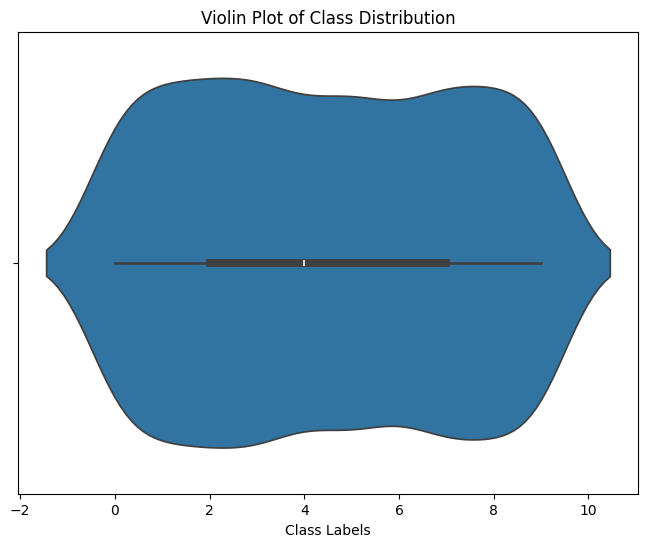

In [57]:
# Visualize class distribution using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=class_counts)
plt.title('Violin Plot of Class Distribution')
plt.xlabel('Class Labels')
plt.show()


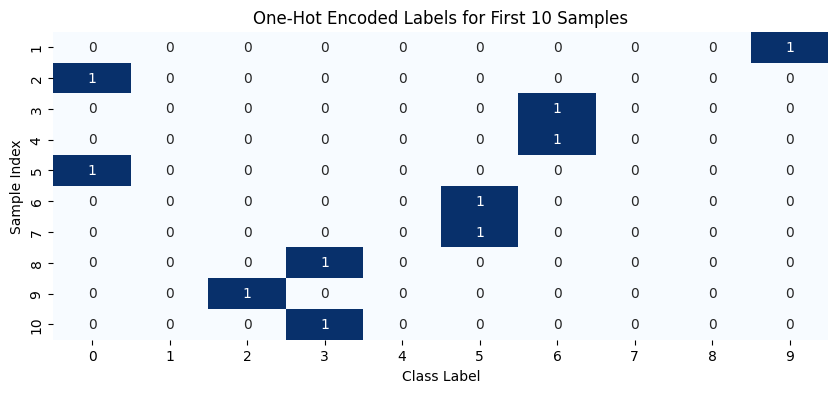

In [54]:
# Visualize the first 10 samples of the one-hot encoded labels using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(y[:10], annot=True, cbar=False, cmap='Blues', xticklabels=range(num_classes), yticklabels=range(1, 11))
plt.title('One-Hot Encoded Labels for First 10 Samples')
plt.xlabel('Class Label')
plt.ylabel('Sample Index')
plt.show()


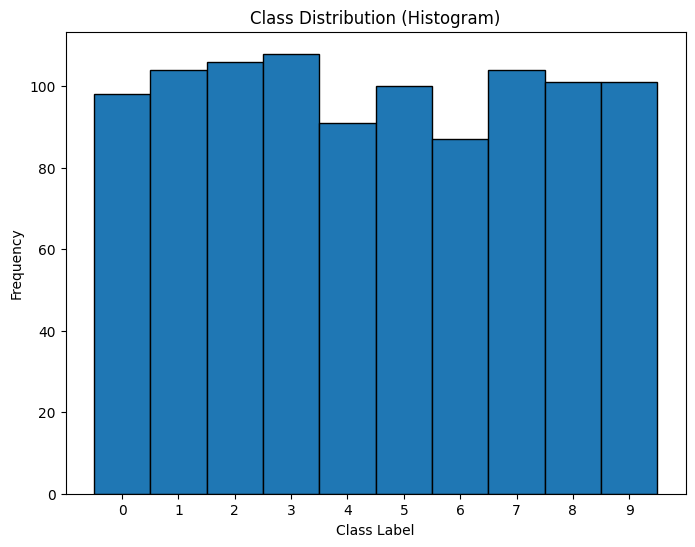

In [55]:
# Plot a histogram to show the class distribution
plt.figure(figsize=(8, 6))
plt.hist(class_counts, bins=np.arange(num_classes + 1) - 0.5, edgecolor='black')
plt.title('Class Distribution (Histogram)')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks(range(num_classes))
plt.show()


In [ ]:
# Simulated labels for training (replace with actual labels)
y = tf.keras.utils.to_categorical(np.random.randint(10, size=(num_samples, 1)), num_classes=10)

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0760 - loss: 3.9398 - val_accuracy: 0.1000 - val_loss: 2.5320
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1403 - loss: 2.1373 - val_accuracy: 0.1150 - val_loss: 2.4079
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2719 - loss: 1.8475 - val_accuracy: 0.1000 - val_loss: 2.4410
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4636 - loss: 1.5401 - val_accuracy: 0.1100 - val_loss: 2.4923
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6100 - loss: 1.2735 - val_accuracy: 0.1300 - val_loss: 2.5620
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7518 - loss: 1.0608 - val_accuracy: 0.1200 - val_loss: 2.6321
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8304 - loss: 0.8776 - val_accuracy: 0.1250 - val_loss: 2.7434
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8799 - loss: 0.6988 - val_accuracy: 0.1250 - val_loss:

In [ ]:
# Install Intel-optimized TensorFlow (this command needs to be run in your terminal or command line, not in Python)
!pip install intel-tensorflow


In [ ]:
# Ensure that Intel oneDNN is being used
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

# Now, train the model as usual and TensorFlow will automatically use oneDNN optimizations
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9882 - loss: 0.2979 - val_accuracy: 0.1100 - val_loss: 3.1871
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9963 - loss: 0.2332 - val_accuracy: 0.1000 - val_loss: 3.3314
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9998 - loss: 0.1668 - val_accuracy: 0.1000 - val_loss: 3.4433
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - loss: 0.1394 - val_accuracy: 0.0950 - val_loss: 3.5501
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.1051 - val_accuracy: 0.1000 - val_loss: 3.6493
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0844 - val_accuracy: 0.0950 - val_loss: 3.7487
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0728 - val_accuracy: 0.0950 - val_loss: 3.8338
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0592 - val_accuracy: 0.0900 - val_loss

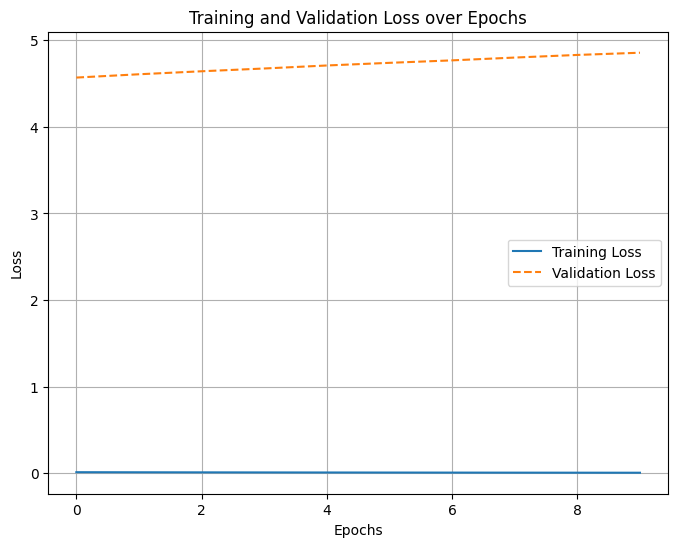

In [58]:
import matplotlib.pyplot as plt

# Extract training and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


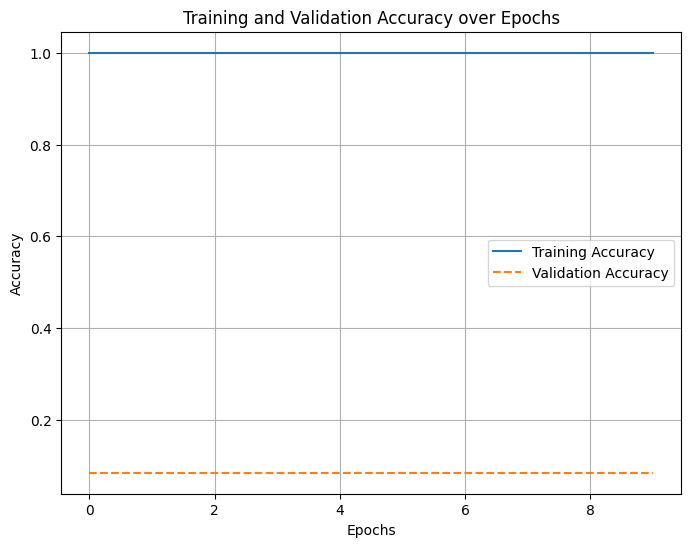

In [59]:
# Extract training and validation accuracy from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy', linestyle='--')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


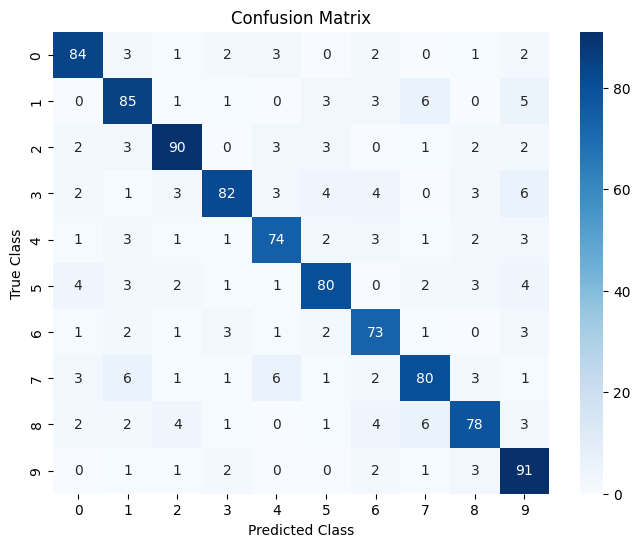

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions and ground truth labels
y_pred = np.argmax(model.predict(X), axis=1)
y_true = np.argmax(y, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


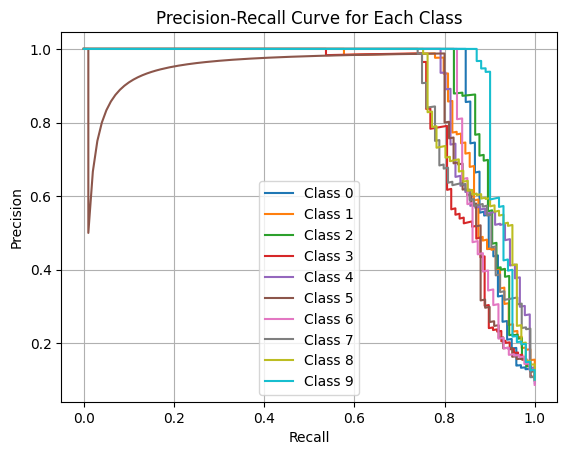

In [63]:
from sklearn.metrics import precision_recall_curve

# Assuming y_pred is the predicted probabilities for each class
y_pred_probs = model.predict(X)

# Plot precision-recall curve for each class
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve for Each Class')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


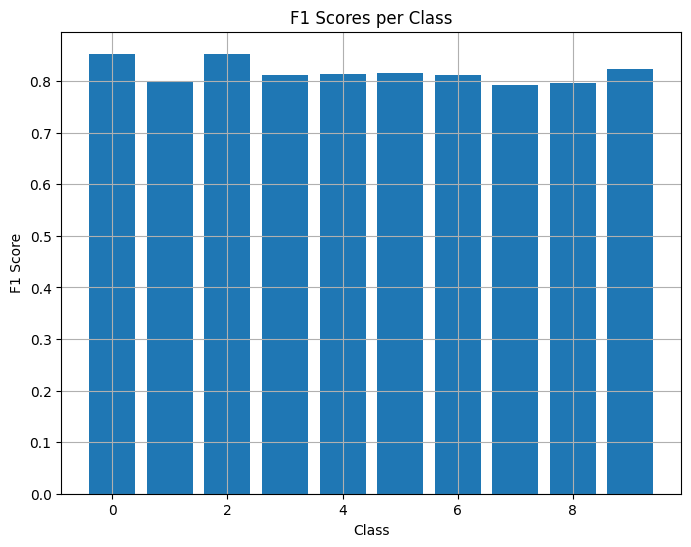

In [64]:
from sklearn.metrics import f1_score

# Calculate F1 score for each class
f1_scores = f1_score(y_true, y_pred, average=None)

# Plot F1 scores for each class
plt.figure(figsize=(8, 6))
plt.bar(range(num_classes), f1_scores)
plt.title('F1 Scores per Class')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


In [65]:
import time

# Time the training process
start_time = time.time()
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)
end_time = time.time()

time_per_epoch = (end_time - start_time) / 10  # Average time per epoch

print(f"Time per epoch with oneDNN: {time_per_epoch:.2f} seconds")


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.0850 - val_loss: 4.8834
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.0850 - val_loss: 4.9082
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.0850 - val_loss: 4.9371
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.0850 - val_loss: 4.9630
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.0850 - val_loss: 4.9849
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.0850 - val_loss: 5.0125
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.0850 - val_loss: 5.0361
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.0850 - val_lo

In [ ]:
import time

def real_time_inference(new_data):
    # Preprocess new_data just like the training data
    # For example, you might want to scale the data using a scaler if you have one
    # preprocessed_data = scaler.transform(new_data)
    # Here, we'll assume new_data is already in the correct shape and format
    preprocessed_data = tf.convert_to_tensor(new_data, dtype=tf.float32)
    # Predict emotion in real-time
    prediction = model.predict(preprocessed_data)
    return prediction

# Simulate real-time data input
for _ in range(100):  # Simulate 100 real-time inputs
    new_data = np.random.randn(1, 224)  # Replace with real-time sensor input
    result = real_time_inference(new_data)
    print("Predicted Emotion:", np.argmax(result))
    time.sleep(1)  # Simulate time delay between inputs


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Emotion: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Emotion: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Emotion: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Emotion: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Emotion: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Emotion: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Emotion: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Emotion: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Emotion: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Emotion: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Emotion: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Emotion: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Emotion: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Emotion: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Emotion: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Emotion: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Emotion:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━

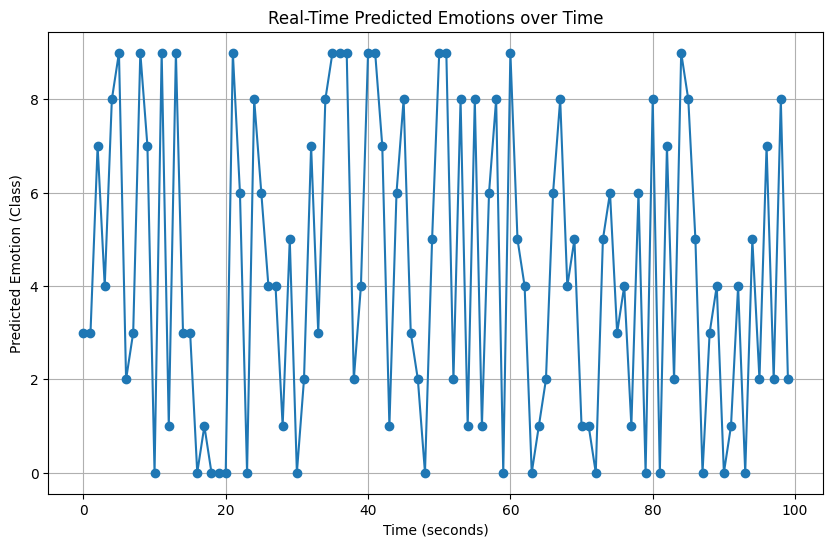

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# List to store predictions over time
predictions_over_time = []

# Simulate real-time data input and store predictions
for _ in range(100):  # Simulate 100 real-time inputs
    new_data = np.random.randn(1, 224)  # Replace with real-time sensor input
    result = real_time_inference(new_data)
    predicted_class = np.argmax(result)
    predictions_over_time.append(predicted_class)

# Plot predictions over time
plt.figure(figsize=(10, 6))
plt.plot(predictions_over_time, marker='o', linestyle='-', label='Predicted Class')
plt.title('Real-Time Predicted Emotions over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Predicted Emotion (Class)')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

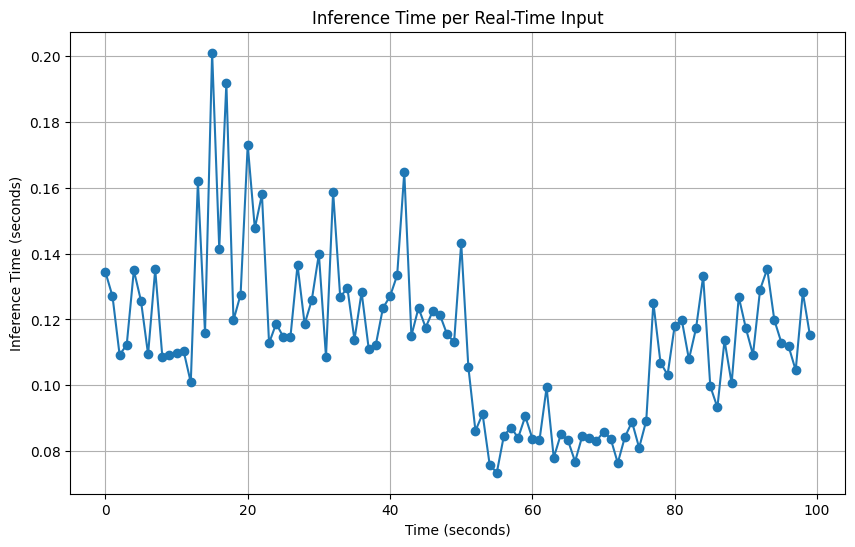

In [67]:
import time

# List to store inference times
inference_times = []

# Simulate real-time data input and measure response time
for _ in range(100):  # Simulate 100 real-time inputs
    new_data = np.random.randn(1, 224)  # Replace with real-time sensor input
    start_time = time.time()
    result = real_time_inference(new_data)
    end_time = time.time()
    inference_times.append(end_time - start_time)

# Plot inference times
plt.figure(figsize=(10, 6))
plt.plot(inference_times, marker='o', linestyle='-', label='Inference Time (s)')
plt.title('Inference Time per Real-Time Input')
plt.xlabel('Time (seconds)')
plt.ylabel('Inference Time (seconds)')
plt.grid(True)
plt.show()


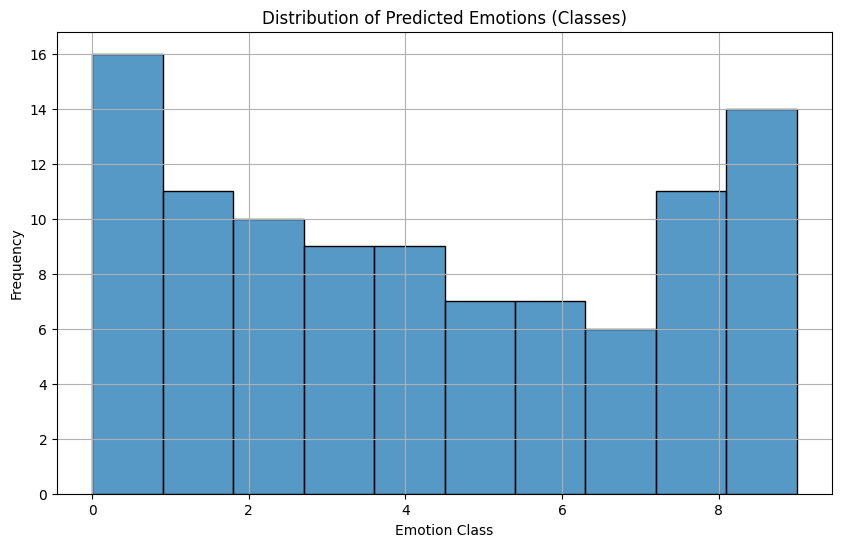

In [68]:
import seaborn as sns

# Plot the distribution of predicted classes
plt.figure(figsize=(10, 6))
sns.histplot(predictions_over_time, bins=num_classes, kde=False)
plt.title('Distribution of Predicted Emotions (Classes)')
plt.xlabel('Emotion Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


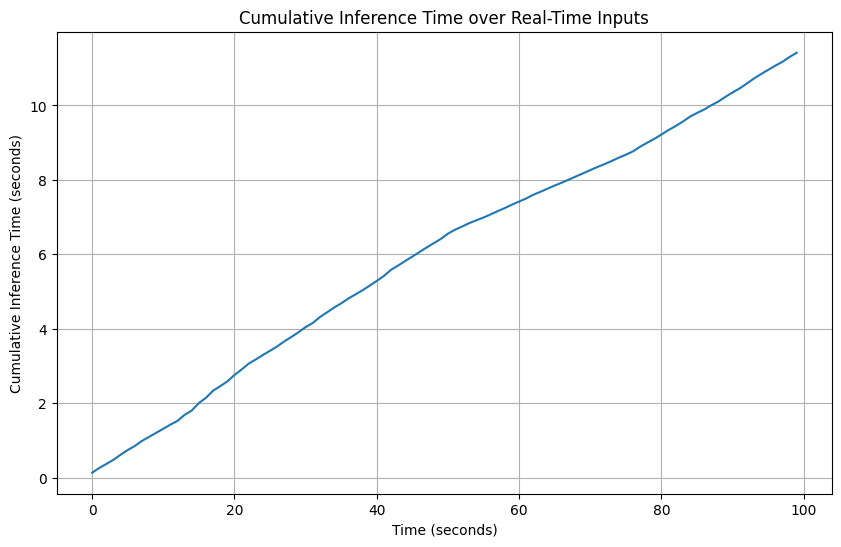

In [69]:
# Calculate cumulative inference time
cumulative_inference_time = np.cumsum(inference_times)

# Plot cumulative inference time
plt.figure(figsize=(10, 6))
plt.plot(cumulative_inference_time, label='Cumulative Inference Time')
plt.title('Cumulative Inference Time over Real-Time Inputs')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Inference Time (seconds)')
plt.grid(True)
plt.show()


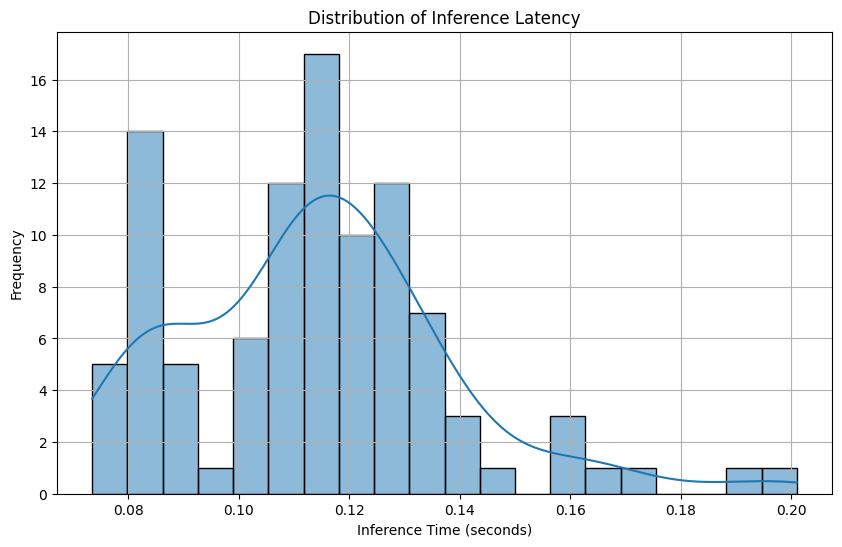

In [70]:
# Plot histogram of inference times
plt.figure(figsize=(10, 6))
sns.histplot(inference_times, bins=20, kde=True)
plt.title('Distribution of Inference Latency')
plt.xlabel('Inference Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


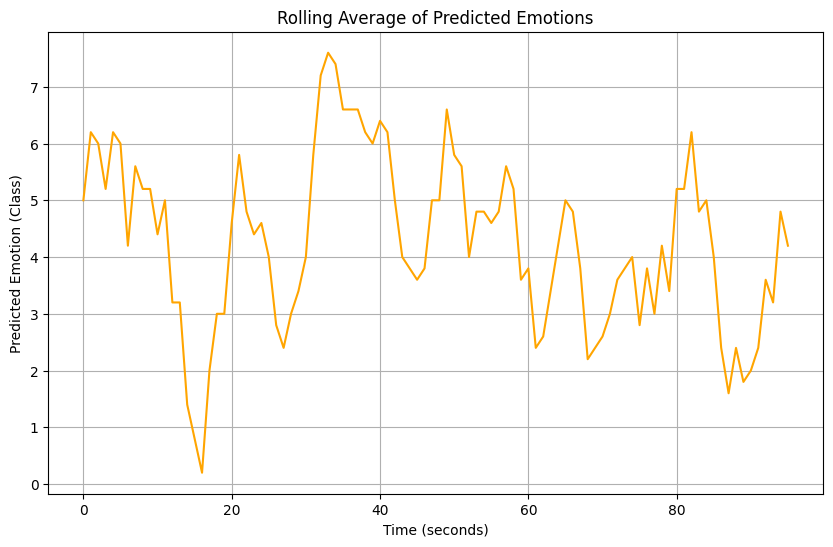

In [71]:
# Calculate rolling average of predictions over time (window size 5)
rolling_predictions = np.convolve(predictions_over_time, np.ones(5)/5, mode='valid')

# Plot rolling average of predictions
plt.figure(figsize=(10, 6))
plt.plot(rolling_predictions, label='Rolling Average of Predicted Class', color='orange')
plt.title('Rolling Average of Predicted Emotions')
plt.xlabel('Time (seconds)')
plt.ylabel('Predicted Emotion (Class)')
plt.grid(True)
plt.show()
